## Exercise 2: Regularization for Logistic Regression

To implement grid search with k-fold cross-validation for model selection i.e. choosing
best hyperparameters(lambda and steplength). Additionally, to extend the logistic regression model from Exercise 1 to
incorporate regularization also.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Downloads/bank.csv',  delimiter=";") #Read the required csv file and store it
df = pd.get_dummies(df,drop_first = True) 
df = df.dropna()

y_df = np.array(df[['y_yes']]) # splitting the target vector
# putting the target feature to y array 
x_df = np.array(df.drop(['y_yes'],axis =1))

mean = x_df.mean() # Normalizing the data set
sd = x_df.std()
x_df = (x_df - mean)/sd
x_df

array([[-2.45955441e-02,  3.38477887e+00, -4.59405177e-02, ...,
        -8.28091084e-02, -8.28091084e-02, -8.08686562e-02],
       [-1.87741877e-02,  9.21001620e+00, -6.14641348e-02, ...,
        -8.28091084e-02, -8.28091084e-02, -8.28091084e-02],
       [-1.48932834e-02,  2.53680128e+00, -5.17618741e-02, ...,
        -8.28091084e-02, -8.28091084e-02, -8.28091084e-02],
       ...,
       [ 2.77966637e-02,  4.89624274e-01, -4.59405177e-02, ...,
        -8.28091084e-02, -8.28091084e-02, -8.08686562e-02],
       [-2.84764484e-02,  2.12348498e+00, -7.11663955e-02, ...,
        -8.08686562e-02, -8.28091084e-02, -8.28091084e-02],
       [ 2.57078587e-03,  2.12154452e+00, -7.69877520e-02, ...,
        -8.08686562e-02, -8.28091084e-02, -8.28091084e-02]])

In [2]:
#Function to implement the log loss with regularisation

def logloss1(y,y_predicted,beta,lamba):
   
    return (y*np.log(y_predicted) + (1-y)*np.log(1-y_predicted)).mean() - (lamba*(beta**2)).sum()


Function to implement logistic Regression mini batch using gradient ascent. Here we include the regularization term lambda also to the loss function. The function is similar to the one implemented for ex 01. But here we check the  Classification Accuracy value instead of log loss value to find the best hyperparameters as log loss value will be very small. 

The classification accuracy value is calculated as- Mean of 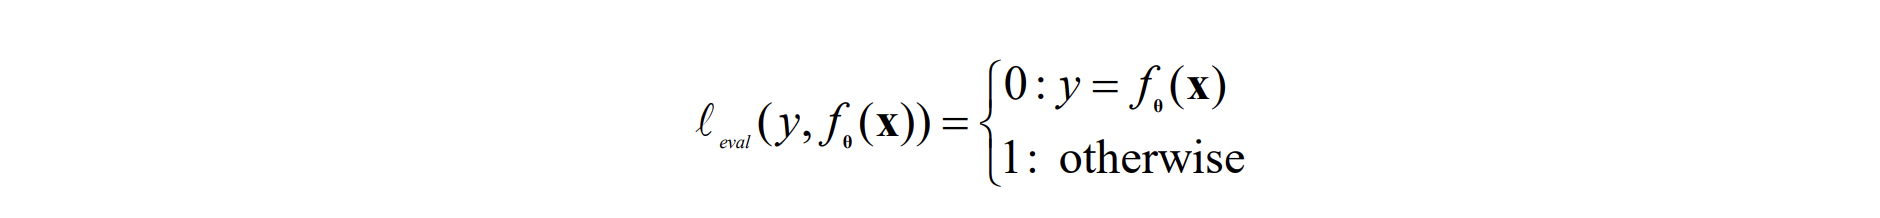

if y_predicted is greater than 0.5, then it is allotted to 1 else 0. Then we check whether y predicted is same as y test and thus calculate the accuracy . The goal is to maximise this accuracy value.

We also add regularisation term to the loss function as follows:
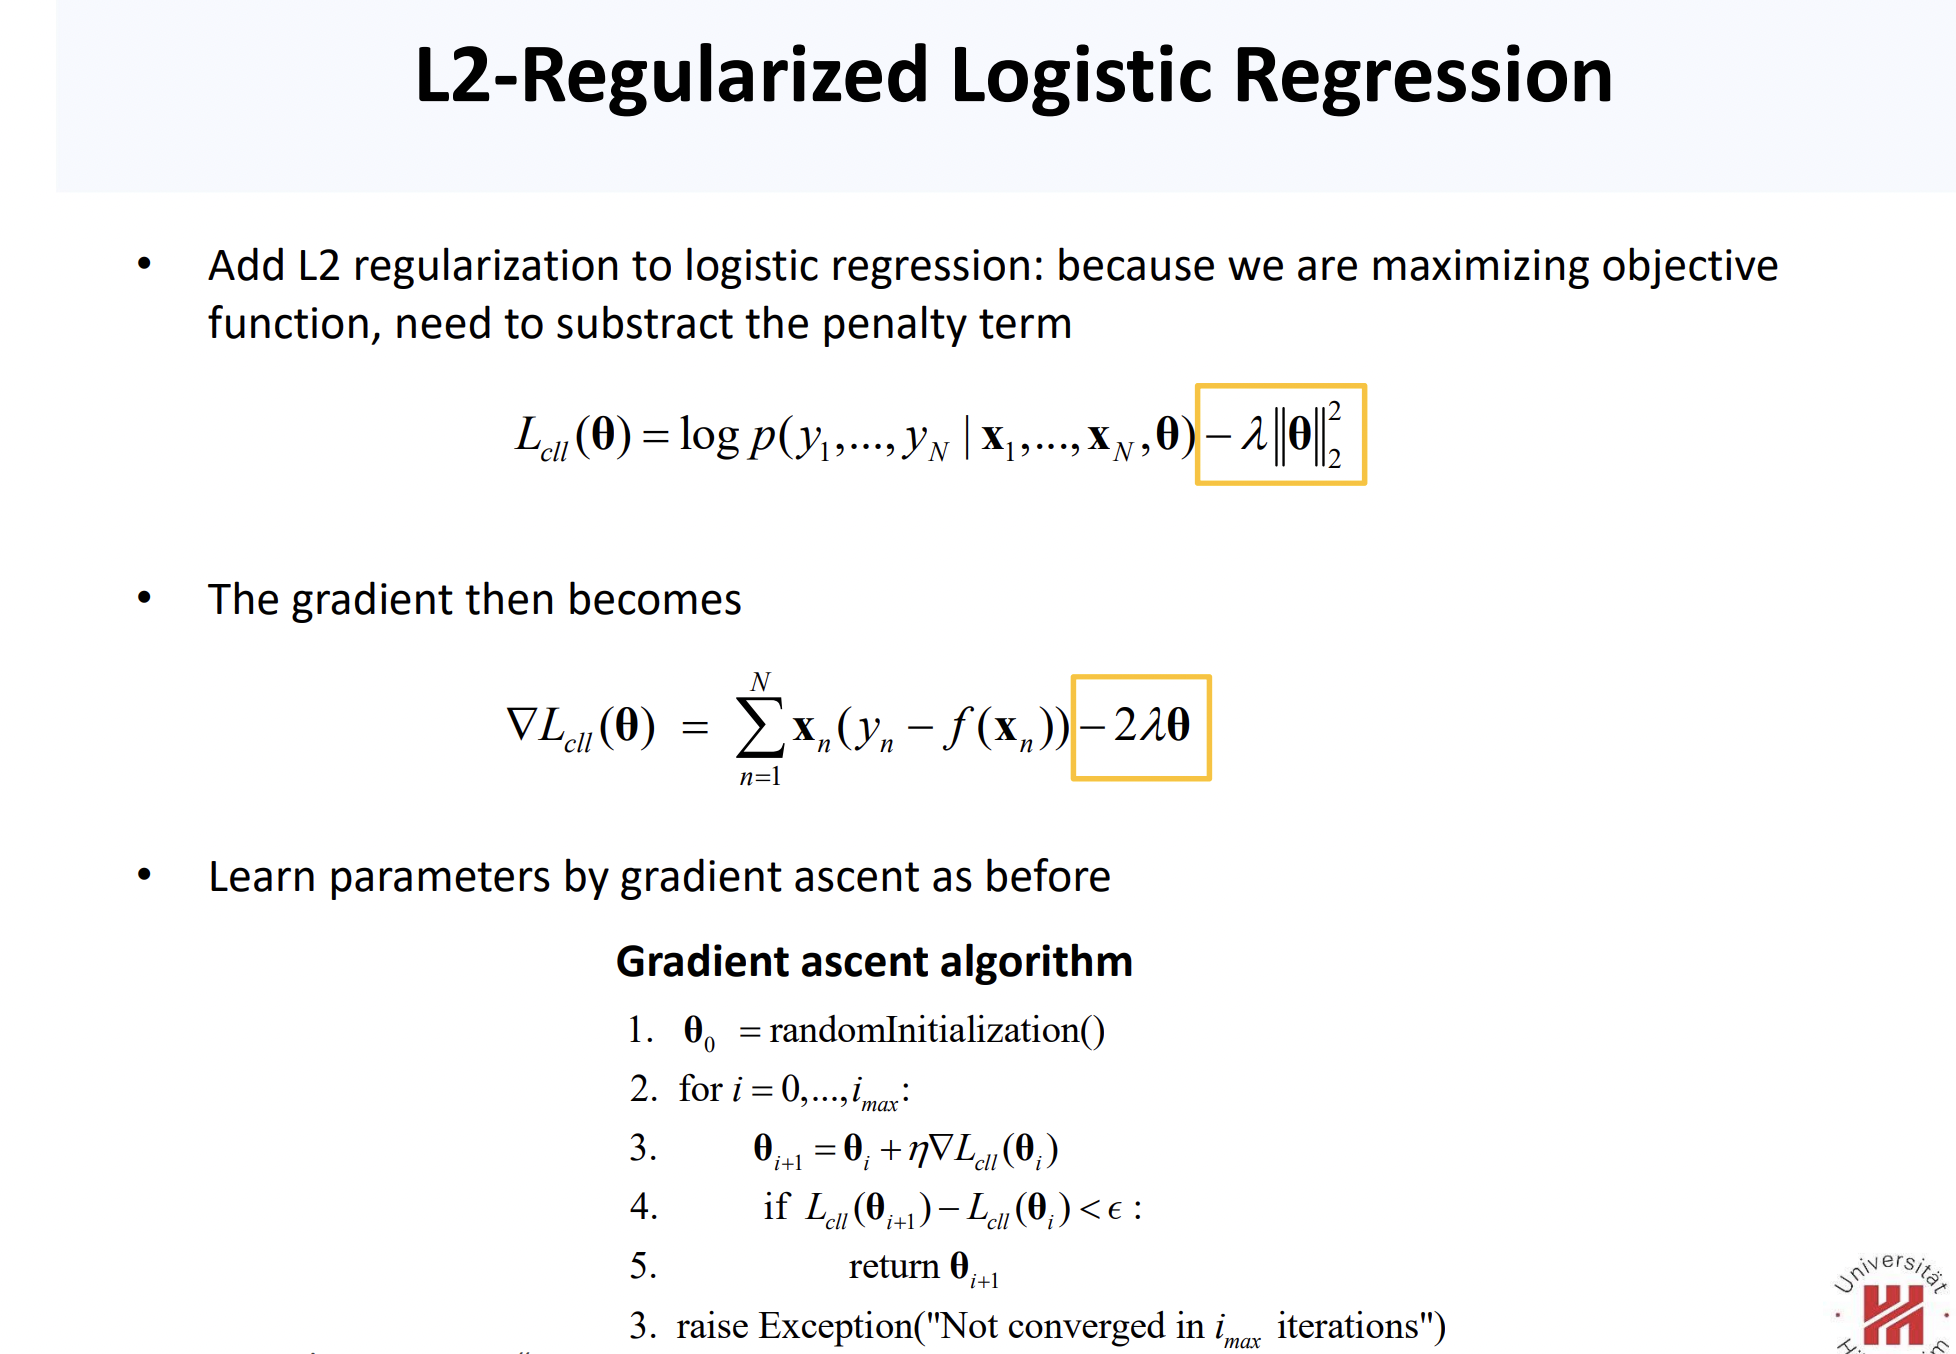

In [3]:

def logReg_miniGA(x_train,y_train,x_test,y_test,mu,lamba,imax):
    
    batch_size = 50          # Fixed batch size
    beta = np.zeros(x_train.shape[1]).reshape(-1,1) # Initializing beta
    log_list_train = []
    log_list_test = []
    check_list = []
    max_check = 0
    
    for i in range(imax):          #For each epoch
        pdt = np.dot(x_train,beta)
        log = np.sum(np.dot(y_train.T,pdt)-np.log(1+ (np.exp(pdt)))) # Eqn of log likelikhood taken from algorithm
        
        #Finding initial y value 
        y_hat_prev = 1/(1+np.exp(-np.dot(x_train,beta)))

        for j in range((len(x_train)//batch_size)):    #Loop for iterating through each batch of x for mini batch gradient ascent
            
            x_batch = x_train[j*batch_size:min((j+1)*batch_size,len(x_train))]  # separating into batches
            y_batch = y_train[j*batch_size:min((j+1)*batch_size,len(y_train))]
            
            y_predicted = 1/(1+np.exp(-np.dot(x_batch,beta)))    #predicting y for one batch of x
            
            #Calculating beta with regularisation term
            beta = beta + mu * ((np.dot(x_batch.T,(y_batch - y_predicted))//len(x_batch)) - (2*lamba*beta) )
            
            y_predicted = 1/(1+np.exp(-np.dot(x_batch,beta))) # Finding y with new beta
            
            
            #Calculating log loss
            log_loss = logloss1(y_batch,y_predicted,beta,lamba)
            log_list_train.append(-log_loss) # appending log loss
            
            
            # finding y and log loss on test set also
            y_predicted_test = 1/(1+np.exp(-np.dot(x_test,beta)))
            
            log_loss_test = -logloss1(y_test,y_predicted_test,beta,lamba)
            log_list_test.append(log_loss_test)
            
            #Classification Accuracy value calculation
            classification = (y_predicted_test>0.5)      # If y value is greater than 0.5, then it is set to value 1
            classification= classification.astype('int') 
            check = (classification == y_test).mean()    # compare the y values and find mean, append this mean accuracy
            check_list.append(check)
            
            
         #Doing the same functions to the elements of x which was not taken in the size 50 batch i.e, the remainder   
        if((len(x_train)%batch_size)>0):
            x_batch = x_train[len(x_train)//batch_size*batch_size:,] 
            y_batch = y_train[len(y_train)//batch_size*batch_size:,]
            
            y_predicted = 1/(1+np.exp(-np.dot(x_batch,beta)))    #predicting y for one batch of x
            
            
            beta = beta + mu * ((np.dot(x_batch.T,(y_batch - y_predicted))//len(x_batch)) - (2*lamba*beta) )
            
            y_predicted = 1/(1+np.exp(-np.dot(x_batch,beta)))
            #print(y_batch.shape,y_predicted.shape)
            log_loss = -logloss1(y_batch,y_predicted,beta,lamba)
            log_list_train.append(log_loss)
            
            y_predicted_test = 1/(1+np.exp(-np.dot(x_test,beta)))
            
            log_loss_test = -logloss1(y_test,y_predicted_test,beta,lamba)
            log_list_test.append(log_loss_test)
            
            classification = (y_predicted_test>0.5)
            classification= classification.astype('int')
            check = (classification == y_test).mean()
            check_list.append(check)
            
            
                
    return log_list_train,log_list_test,check_list   # returning the log loss values and accuracy value 
            
            


To implement k-fold cross-validation protocol for grid search. For each combination of steplength and λ ,we
will perform k-fold cross-validation. Let k = 5 in this case as given in question. For cross validation, we divide the data set into folds(partitions) and take one partition as test and the rest as training data. Thus we iteratively take each fold as test set. For each fold we perform logistic regression and find the accuracy value. 

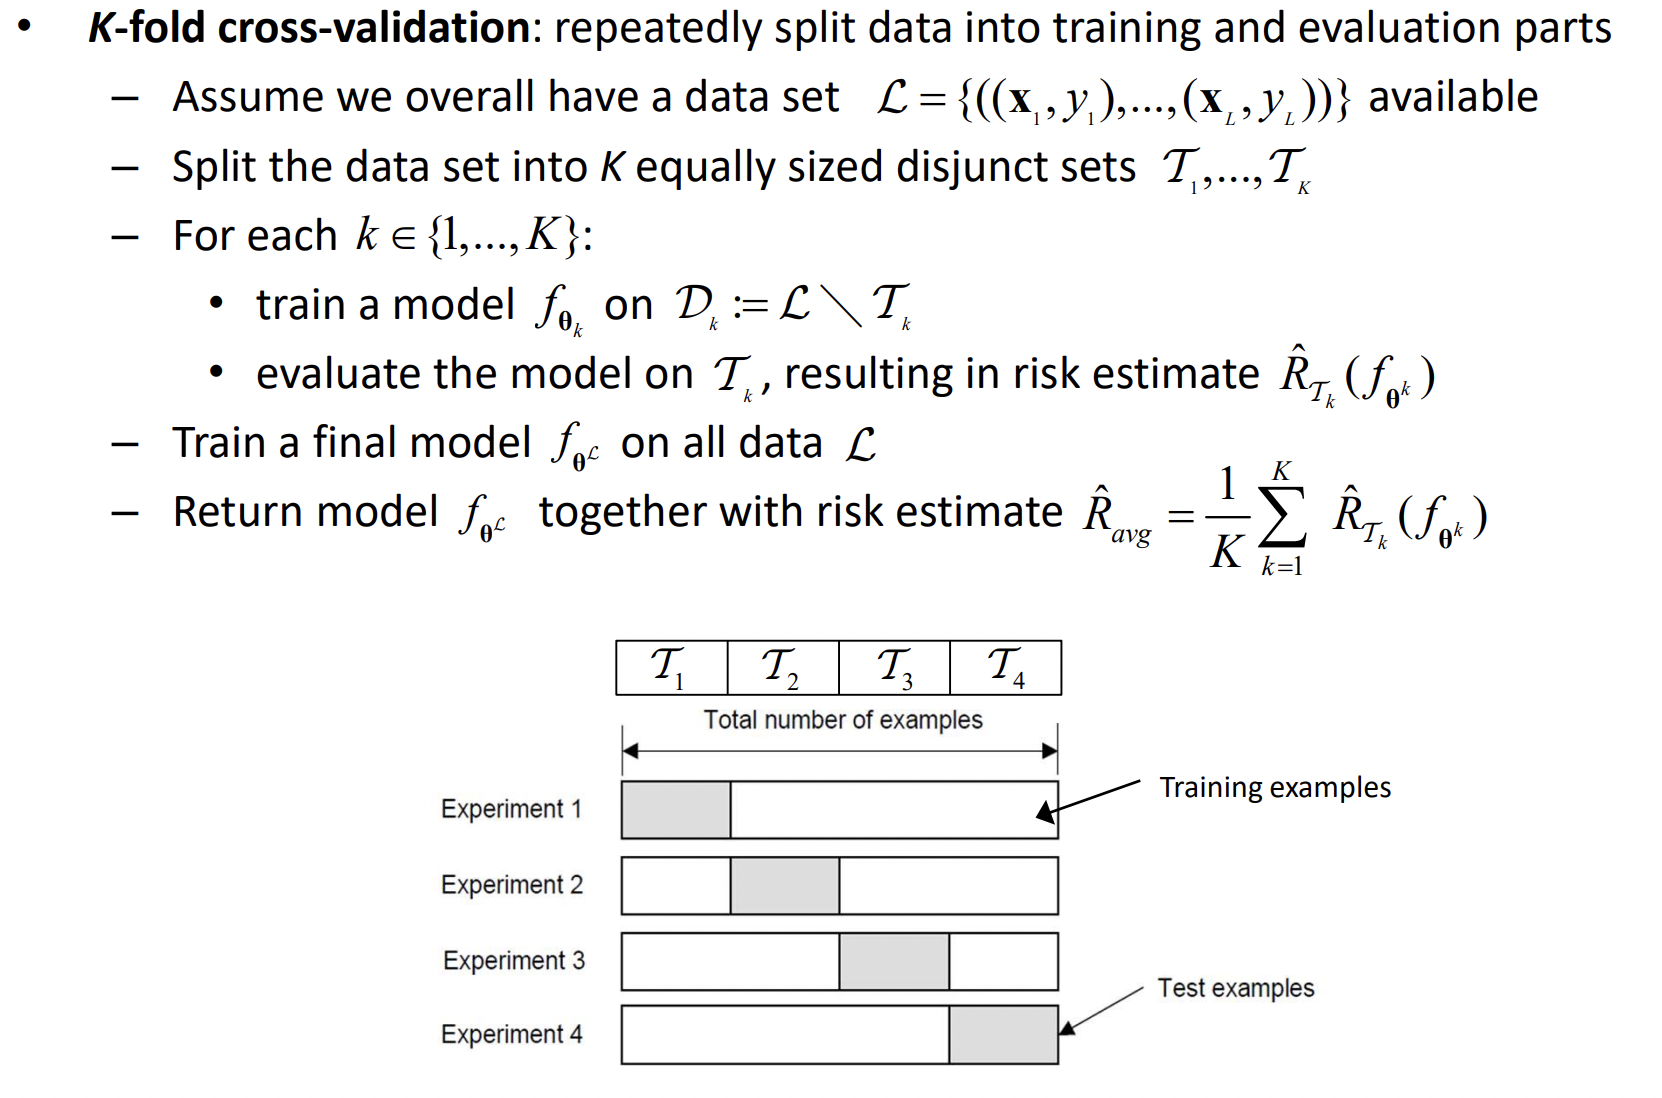


Here instead of Risk estimator we calculate the accuracy value. We calculate the accuracy value for the entire set by taking the mean of value of each fold. Thus we get accuracy value for each combination of the hyper parameters

In [4]:
def kcrossvalidation(x_data,y_data,mu,lamba,imax):
    K = 5                 #given
    lenx = len(x_data)    #total length of data set
    log_loss_test_min=[]
    check_list_min = []
    total_logloss = 0
    total_check = 0
    log_loss_train = []
    log_loss_test =[]
    check_list = []
    
    
    for i in range(K):       # Iteration for each fold
        
        index_total = np.arange(lenx)    # Storing the total index
        test_index = np.arange(((lenx*i)//K),((lenx*(i+1))//K))   # taking one fold as test
        
        train_index = np.delete(index_total,test_index)   # deleting the test from overall to get the train set

        x_train = x_data[train_index,:]   # forming the train and test data sets 
        x_test = x_data[test_index,:]
        y_train = y_data[train_index,:]
        y_test = y_data[test_index,:]
        
        #Calling the logistic regression function and getting losss and accuracy for one fold 
        log_loss_train,log_loss_test,check_list = logReg_miniGA(x_train,y_train,x_test,y_test,mu,lamba,imax)
        
        log_loss_test_min.append(np.mean(log_loss_test)) #Finding mean of the metrics and storing per k fold
        check_list_min.append(np.mean(check_list))
        
    total_logloss = (np.mean(log_loss_test_min))  # Calculating the mean loss and accuracy of all folds
    total_check = np.mean(check_list_min)
    
    return log_loss_test_min,check_list_min,total_logloss,total_check # returning the metrics

Defining a range of mu(steplength) and lamba ( lambda ) and calling the cross validation function for each combination of mu and lambda. For each combination we return an accuracy value. Then the maximum accuracy value is checked from all the values recieved. The hyperparameters which produced the maximum accuracy is the optimum parameters.

Here we are storing the loss and accuracy for each combination of hyper parameters in 2 d arrays ( grid format).
All combinations of mu and lambda are taken from a specifies range,which is grid search.

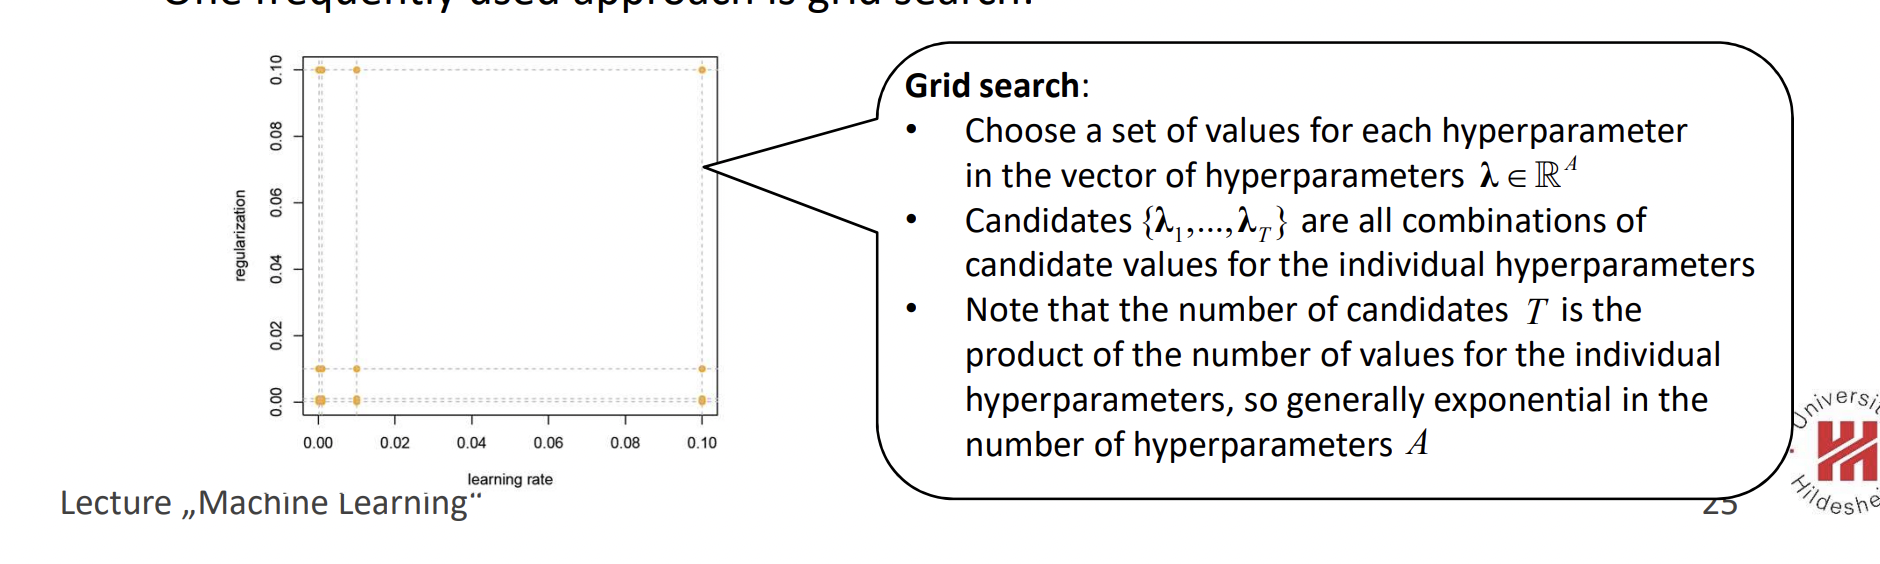

In [5]:

mu = np.linspace(0.0000001,0.1,10)  # defining mu , here I took 10 values within a specified range
lamba = np.linspace(0.0000001,0.1,10) # defining lambda

logloss = np.ones((10,10))
check = np.ones((10,10))
log_loss_test_min = []
check_list_min = []
total_logloss = 0
total_check = 0

#Loops for iterating through each combination of mu and lambda
for i in range(10):
    for j in range(10):
        #Calling the validation function
        log_loss_test_min,check_list_min,total_logloss,total_check = kcrossvalidation(x_df,y_df,mu[i],lamba[j],2)
        logloss[i,j] = total_logloss #Logloss of a particular mu and lambda
        check[i,j] = total_check     #accuracy of a particular mu and lambda

#Returning the indices of the element with maximum value in the accuracy array
result = np.where(check == np.amax(check)) 
print('Tuple of arrays returned : ', result)
print('List of coordinates of maximum value in Numpy array : ')
# zip the 2 arrays to get the exact coordinates
listOfCordinates = list(zip(result[0], result[1]))



Tuple of arrays returned :  (array([1]), array([9]))
List of coordinates of maximum value in Numpy array : 


In [6]:
# travese over the list of cordinates
for i in listOfCordinates:
    print(i)
    
    
print(listOfCordinates[0])    
indices = listOfCordinates[0]
#print(indices[0])

print("best steplength and lambda-",mu[indices[0]],", ",lamba[indices[1]])
print("best accuracy-",check[indices])
print("best logloss-",logloss[indices])



(1, 9)
(1, 9)
best steplength and lambda- 0.0111112 ,  0.1
best accuracy- 0.8039825704639236
best logloss- 0.6761297093968527


Plot on the grid α0 vs λ the Classification Accuracy score for all combinations

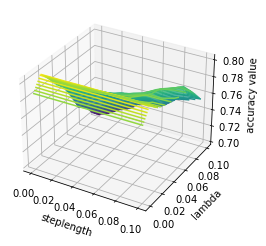

In [7]:

fig = plt.figure()
axes = fig.gca(projection ='3d')
x,y = np.meshgrid(mu,lamba)

axes.contour3D(x,y,check,50)

axes.set_xlabel("steplength")
axes.set_ylabel("lambda")
axes.set_zlabel("accuracy value")
plt.show()

For the optimal value of alpha0 and λ, training the model on complete training data and
evaluating on Test data.

In [8]:

log_loss_test_min,check_list_min,total_logloss,total_check = kcrossvalidation(x_df,y_df,mu[indices[0]],lamba[indices[1]],2)
print("Final Accuracy value -",total_check)
print("Final loss-",total_logloss)
#log_loss_test_min


Final Accuracy value - 0.8039825704639236
Final loss- 0.6761297093968527


Ploting Accuracy and Log-likelihood metrics per k − fold iteration

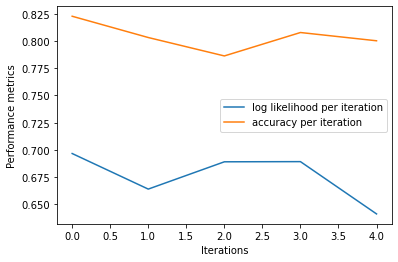

In [9]:

plt.plot(range(5),log_loss_test_min, label="log likelihood per iteration")
plt.plot(range(5),check_list_min,label ="accuracy per iteration")
plt.xlabel("Iterations")
plt.ylabel("Performance metrics")
plt.legend()
plt.show()

We observe that the log loss is minimum for the optimum hyper parameters and the accuracy is maximum for the optimum hyper parameter values. We also see that after each k fold iteration , the loss decreases and reaches min value at the end. While for the accuracy, the value dips and then increases to reach a stable value at the end of the 5 th fold.

### References

https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6
https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
https://www.statology.org/aic-in-python/
https://stackoverflow.com/questions/10996140/how-to-remove-specific-elements-in-a-numpy-array
https://www.ismll.uni-hildesheim.de/lehre/ml-20w/script/index.html
https://github.com/iamkucuk/Logistic-Regression-With-Mini-Batch-Gradient-Descent/blob/master/logistic_regression_notebook.ipynb
https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
https://thispointer.com/find-max-value-its-index-in-numpy-array-numpy-amax/